<a href="https://colab.research.google.com/github/ebola1997/Belajar/blob/main/AlpukatBetawi_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Packages

In [ ]:
!pip install swifter

     |████████████████████████████████| 280 kB 32.1 MB/s 
     |████████████████████████████████| 133 kB 63.6 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
!pip install sastrawi

     |████████████████████████████████| 209 kB 26.3 MB/s 


In [ ]:
!pip install google-play-scraper

     |████████████████████████████████| 52 kB 1.2 MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.3-py3-none-any.whl size=24394 sha256=128dff1bf8c08d597d6600da00d92dcae68c0ed58e7eb2f5c036602d7a2f7632
  Stored in directory: /root/.cache/pip/wheels/81/37/0b/4a14be55b449a048cd93d79930b1a980dee7896480defa1923
Successfully built google-play-scraper


In [ ]:
from google_play_scraper import app
from google_play_scraper import Sort, reviews_all
from google_play_scraper import Sort, reviews
import pandas as pd

import numpy as np

import pytz
import re
import nltk
import ast
import string
import itertools
import matplotlib.pyplot as plt
import seaborn as sns


import io
import pickle, os

from datetime import datetime,timedelta
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn import naive_bayes
from sklearn.metrics import  classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from textblob import TextBlob

#Crawling

In [ ]:
crawling = reviews_all(
    'com.disdukcapildki.alpukat',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT , you can use Sort.NEWEST to get newst reviews
)

In [ ]:
data_ps = pd.DataFrame(np.array(crawling),columns=['review'])

data_ps = data_ps.join(pd.DataFrame(data_ps.pop('review').tolist()))

data_ps.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFV4yqalwWNjoN_oN3rLlC8qM53lpfJjkCWwHk...,Ilhammeth Selamat,https://play-lh.googleusercontent.com/a-/AOh14...,"Gak usah pusing lagi, teknologi menuntun semua...",5,0,1.2.6,2022-01-15 06:02:29,None,None
1,gp:AOqpTOFvYC9tXYMyRflru9V1wEkdNV2ROexj3XTFrNW...,Aldo Alexander,https://play-lh.googleusercontent.com/a-/AOh14...,Kalau tidak memiliki data orang tua apakah bis...,5,0,1.2.6,2022-01-15 04:02:21,None,None


In [ ]:
len(data_ps.index) #count the number of data we got

3707

In [ ]:
crawling, continuation_token = reviews(
    'id.ac.uinjkt.aismobile',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1000, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [ ]:
data_ps.to_csv("data_alpukat.csv")

# Crawling Selesai / Next Upload File

#Import Data to Colab

In [ ]:
#import file dari komputer
from google.colab import files
  
  
uploaded = files.upload()

Saving data_alpukat.csv to data_alpukat.csv


In [ ]:
alpukat = pd.read_csv("data_alpukat.csv")

In [ ]:
alpukat.tail(2)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
3705,3705,gp:AOqpTOEHy4OuQ4Ge1hRNEZIf00wBqYPCqiubwRyuC-a...,Ranger Merah,https://play-lh.googleusercontent.com/a-/AOh14...,Aplikasi yang bagus dan perlu di kembangkan.. ...,5,21,1.0.23,2019-10-14 10:57:06,NaN,NaN
3706,3706,gp:AOqpTOErOW53u9d_scgaASoL26aAkUTgkvXRYPZ1PLD...,Nurul Faiza,https://play-lh.googleusercontent.com/a/AATXAJ...,Mantaaf,2,2,1.0.22,2019-10-03 03:11:16,NaN,NaN


# Preprocessing

In [ ]:
data = alpukat[['userName','at','content','score']] 
data.head(2)

,userName,at,content,score
0,Ilhammeth Selamat,2022-01-15 06:02:29,"Gak usah pusing lagi, teknologi menuntun semua...",5
1,Aldo Alexander,2022-01-15 04:02:21,Kalau tidak memiliki data orang tua apakah bis...,5


In [ ]:
data.to_csv("data_terpisah.csv")

In [ ]:
def cleanTweet(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
    text = re.sub(r'[0-9]+', '', text) # Remove number
    text = re.sub(r'#','', text) # Remove #hashtag symbol
    text = re.sub(r'[^\w]', ' ', text)# Remove symbols
    text = re.sub(r'_', ' ', text)# Remove underscore
    text = re.sub(r'[\n]+', '', text) # Remove new line
    text = re.sub(r':', '', text) # Remove : symbols
    text = re.sub(r'RT[\s]+', '', text) # Remove RT word
    re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE) # Removing https hyperlink
    re.sub(r'^http?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE) # Removing http hyperlink
    text = text.lower()
    
    return text# lets apply to our data frame

In [ ]:
data['clean'] = data['content'].apply(cleanTweet)# perintah cleaning komentar
data.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,userName,at,content,score,clean
0,Ilhammeth Selamat,2022-01-15 06:02:29,"Gak usah pusing lagi, teknologi menuntun semua...",5,gak usah pusing lagi teknologi menuntun semua...
1,Aldo Alexander,2022-01-15 04:02:21,Kalau tidak memiliki data orang tua apakah bis...,5,kalau tidak memiliki data orang tua apakah bis...


In [ ]:
data = data[['userName','at','content','clean','score']]
data.head(2)

,userName,at,content,clean,score
0,Ilhammeth Selamat,2022-01-15 06:02:29,"Gak usah pusing lagi, teknologi menuntun semua...",gak usah pusing lagi teknologi menuntun semua...,5
1,Aldo Alexander,2022-01-15 04:02:21,Kalau tidak memiliki data orang tua apakah bis...,kalau tidak memiliki data orang tua apakah bis...,5


In [ ]:
data.to_csv("data_clean.csv")

In [ ]:
data["score"].value_counts()

5    1617
1    1408
2     251
3     224
4     207
Name: score, dtype: int64

In [ ]:
label = []
for index, row in data.iterrows():
    if row["score"] > 3:
        label.append("positif")
    else:
        label.append("negatif")
# fungsi labeling

In [ ]:
data["label"] = label
'''data = data.drop(columns=['score']) #tidak digunakan'''
data.head(5)

,userName,at,content,clean,score,label
0,Ilhammeth Selamat,2022-01-15 06:02:29,"Gak usah pusing lagi, teknologi menuntun semua...",gak usah pusing lagi teknologi menuntun semua...,5,positif
1,Aldo Alexander,2022-01-15 04:02:21,Kalau tidak memiliki data orang tua apakah bis...,kalau tidak memiliki data orang tua apakah bis...,5,positif
2,MH DAYVLOG22,2022-01-14 12:39:03,"Aplikasi sangat membantu bener dah,kaga bohong...",aplikasi sangat membantu bener dah kaga bohong...,5,positif
3,Fauzi Pelu,2022-01-14 12:26:13,Mantap,mantap,5,positif
4,philia kholly,2022-01-14 07:46:55,Kok saya mau login gak bisa bisa malah muncul ...,kok saya mau login gak bisa bisa malah muncul ...,1,negatif


In [ ]:
data.to_csv("data_label.csv")

In [ ]:
data["label"].value_counts()

negatif    1883
positif    1824
Name: label, dtype: int64

In [ ]:
data2 = data.copy()
data2 = data2.drop(columns=['userName', 'at'])
data2.head(2)

#backup data

,content,clean,score,label
0,"Gak usah pusing lagi, teknologi menuntun semua...",gak usah pusing lagi teknologi menuntun semua...,5,positif
1,Kalau tidak memiliki data orang tua apakah bis...,kalau tidak memiliki data orang tua apakah bis...,5,positif


In [ ]:
s_1 = data2[data2['label']=="negatif"].sample(1500,replace=True)
s_2 = data2[data2['label']=="positif"].sample(1500,replace=True)
data3 = pd.concat([s_1, s_2])

print(data3.shape)
print(data3['label'].value_counts(normalize=True))

In [ ]:
data3 = data2.copy()

In [ ]:
data3.to_csv("data_scale.csv")

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#panggil fungsi wordcloud (visualisasi kata pada data)


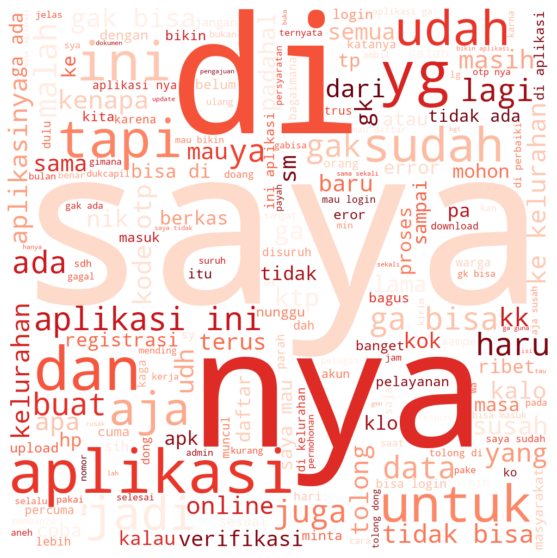

In [ ]:
# Polarity == negative
train_s0 = data3[data3["label"] == "negatif"]
all_text_s0 = ' '.join(word for word in train_s0["clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()



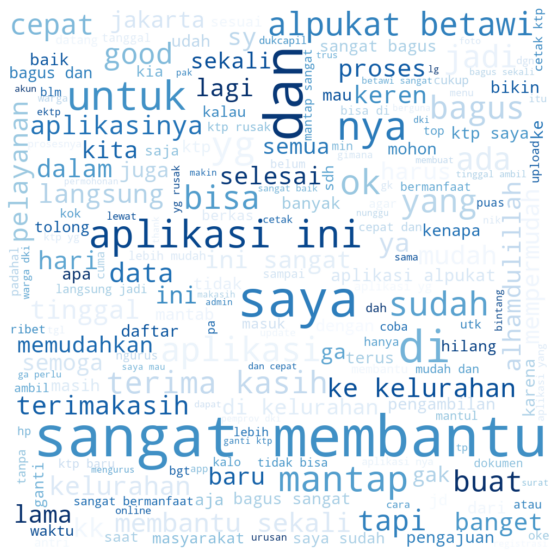

In [ ]:
# Polarity == positive
train_s1 = data3[data3["label"] == "positif"]
all_text_s1 = ' '.join(word for word in train_s1["clean"])
wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white', mode='RGBA').generate(all_text_s1)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
wf=wordcloud.words_
wf

In [ ]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
 
# Contoh
kalimat = 'tidak buruk'
stop = stopword.remove(kalimat)
print(stop)

buruk


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# contoh
kalimat = 'pencitraan'
katadasar = stemmer.stem(kalimat)
 
print(katadasar)

citra


In [ ]:
# lakukan pada data kita

review = []
for index, row in data3.iterrows():
    review.append(stopword.remove(row["clean"]))
    
data3["clean"] = review
data3.head(5)


,content,clean,score,label
0,"Gak usah pusing lagi, teknologi menuntun semua...",gak usah pusing teknologi menuntun semua jadi...,5,positif
1,Kalau tidak memiliki data orang tua apakah bis...,kalau memiliki data orang tua bisa usai sdh th...,5,positif
2,"Aplikasi sangat membantu bener dah,kaga bohong...",aplikasi sangat membantu bener dah kaga bohong...,5,positif
3,Mantap,mantap,5,positif
4,Kok saya mau login gak bisa bisa malah muncul ...,kok mau login gak bisa malah muncul tulisan to...,1,negatif


In [ ]:
# lakukan pada data kita

review = []
for index, row in data3.iterrows():
    review.append(stemmer.stem(row["clean"]))
    
data3["clean"] = review
data3.head(5)


,content,clean,score,label
0,"Gak usah pusing lagi, teknologi menuntun semua...",gak usah pusing teknologi tuntun semua jadi sa...,5,positif
1,Kalau tidak memiliki data orang tua apakah bis...,kalau milik data orang tua bisa usai sdh thn h...,5,positif
2,"Aplikasi sangat membantu bener dah,kaga bohong...",aplikasi sangat bantu bener dah kaga bohong ki...,5,positif
3,Mantap,mantap,5,positif
4,Kok saya mau login gak bisa bisa malah muncul ...,kok mau login gak bisa malah muncul tulis toke...,1,negatif


In [ ]:
data3.head(5)


In [ ]:
data3.to_csv("data_preprocessingselesai.csv")

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data3['clean'], data3['label'], 
                                                    test_size=0.2, stratify=data3['label'], random_state=30)
#panggil fungsi bagi data train dan data uji

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'Pusing satu kali',
    'Pusing dua kali',
    'Pusing tiga kali',
    'Pusing lagi']

vectorizer = TfidfVectorizer()

# contoh
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0.        , 0.49248889, 0.        , 0.40264194, 0.77157901,
        0.        ],
       [0.77157901, 0.49248889, 0.        , 0.40264194, 0.        ,
        0.        ],
       [0.        , 0.49248889, 0.        , 0.40264194, 0.        ,
        0.77157901],
       [0.        , 0.        , 0.88654763, 0.46263733, 0.        ,
        0.        ]])

In [ ]:
# implementasi pada data kita
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(2965, 3527)
(742, 3527)


In [ ]:
def pembobotan(data):
    # count vectorizer
    data = vectorizer.transform([data])
    
    return data

In [ ]:
from sklearn.svm import LinearSVC, SVC

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel="linear")

#cross_val_score(clf, X_train, y_train, cv=10)

In [ ]:
data3.head(10)

,content,clean,score,label
0,"Gak usah pusing lagi, teknologi menuntun semua...",gak usah pusing teknologi tuntun semua jadi sa...,5,positif
1,Kalau tidak memiliki data orang tua apakah bis...,kalau milik data orang tua bisa usai sdh thn h...,5,positif
2,"Aplikasi sangat membantu bener dah,kaga bohong...",aplikasi sangat bantu bener dah kaga bohong ki...,5,positif
3,Mantap,mantap,5,positif
4,Kok saya mau login gak bisa bisa malah muncul ...,kok mau login gak bisa malah muncul tulis toke...,1,negatif
5,Gimana klo lupa password n nm tlp udah ganti??,gimana klo lupa password n nm tlp udah ganti,4,positif
6,Mau tanya untuk perubahan biodata KTP di bagia...,mau tanya ubah biodata ktp bagi alamat nya sam...,4,positif
7,Percuma ngajuin permohonan lwt online di aplik...,percuma ngajuin mohon lwt online aplikasi bgtu...,1,negatif
8,. Saya udh ngajuin permohonan dari awal desemb...,udh ngajuin mohon awal desember sampe ini ada ...,1,negatif
9,Saya wilayah jakbar cuma mau ganti kk barcode ...,wilayah jakbar cuma mau ganti kk barcode doank...,1,negatif


In [ ]:
# import library evaluation
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# lakukan prediksi pada data train
# untuk mencari nilai cost terbaik pada data test
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
  clf = LinearSVC(C=c)
  clf.fit(X_train, y_train)
  print("akurasi untuk c = %s : %s" % (c, accuracy_score(y_test, clf.predict(X_test))))

akurasi untuk c = 0.001 : 0.8005390835579514
akurasi untuk c = 0.01 : 0.8787061994609164
akurasi untuk c = 0.1 : 0.8975741239892183
akurasi untuk c = 1 : 0.8827493261455526
akurasi untuk c = 10 : 0.8504043126684636
akurasi untuk c = 100 : 0.8113207547169812


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# lakukan penerapan pada data test
clf = LinearSVC(C= 0.1)
clf.fit(X_test, y_test)
print("akurasi untuk c = %s : %s" % ("0.1", accuracy_score(y_test, clf.predict(X_test))))

akurasi untuk c = 0.1 : 0.9393530997304582


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# confusion matrix
print("Akurasi pada SVM:")
print(accuracy_score(y_test, y_pred))

cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print(classification_report(y_test, y_pred))


Akurasi pada SVM:
0.9393530997304582
[[362  15]
 [ 30 335]]
              precision    recall  f1-score   support

     negatif       0.92      0.96      0.94       377
     positif       0.96      0.92      0.94       365

    accuracy                           0.94       742
   macro avg       0.94      0.94      0.94       742
weighted avg       0.94      0.94      0.94       742



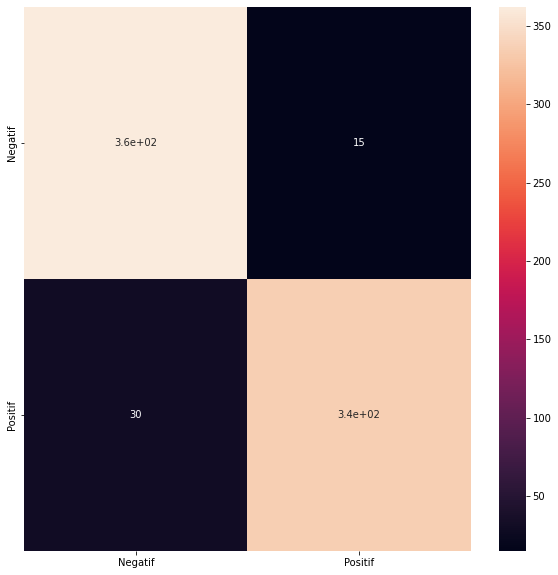

In [ ]:
#grafik confusion matrix
cm = np.array(confusion_matrix(y_test, y_pred))

fig = plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, xticklabels=['Negatif','Positif'], yticklabels=['Negatif','Positif'])

Selesai

In [ ]:
# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test, y_pred))


accuracy score hasil prediksi adalah: 
0.9393530997304582


In [ ]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(362, 15, 30, 335)

In [ ]:

print("Akurasi pada SVM:")
print(accuracy_score(y_test, y_pred))

cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print(classification_report(y_test, y_pred))


Akurasi pada SVM:
0.9393530997304582
[[362  15]
 [ 30 335]]
              precision    recall  f1-score   support

     negatif       0.92      0.96      0.94       377
     positif       0.96      0.92      0.94       365

    accuracy                           0.94       742
   macro avg       0.94      0.94      0.94       742
weighted avg       0.94      0.94      0.94       742



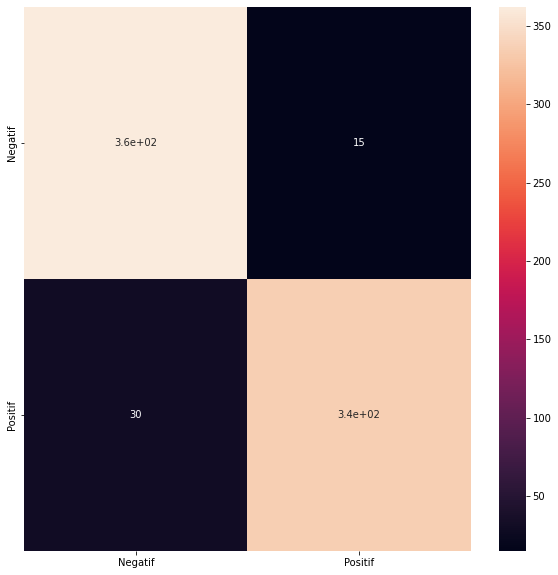

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
plot_confusion_matrix(clf, y_test, y_pred)  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

In [ ]:
data3.dtypes

content    object
clean      object
score       int64
label      object
dtype: object